In [3]:
#Rodrigo Augusto de Oliveira
#!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

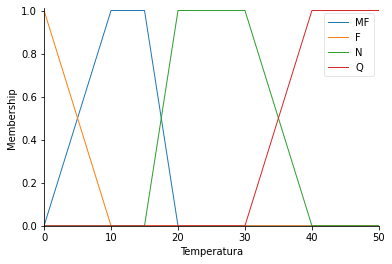

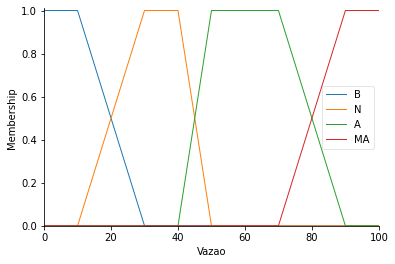

In [4]:

temperatura = ctrl.Antecedent(np.arange(0, 51, 1), "Temperatura") 
vazao = ctrl.Antecedent(np.arange(0, 101, 1), "Vazao") 

temperatura["MF"] = fuzz.trapmf(temperatura.universe, [0, 10, 15,20])
temperatura["F"]  = fuzz.trimf(temperatura.universe, [0, 0,10]) 
temperatura["N"] = fuzz.trapmf(temperatura.universe, [15, 20, 30,40])
temperatura["Q"]  = fuzz.trapmf(temperatura.universe, [30, 40, 50,50])

vazao["B"] = fuzz.trapmf(vazao.universe, [0, 0, 10,30])
vazao["N"]  = fuzz.trapmf(vazao.universe, [10, 30, 40,50])
vazao["A"] = fuzz.trapmf(vazao.universe, [40, 50, 70,90])
vazao["MA"]  = fuzz.trapmf(vazao.universe, [70, 90, 100,100])
 
# vazao.automf(5, names=["B", "N" , "A" , "MA" ])
# temperatura.automf(5, names=["MF", "F" , "N" , "Q" ])

temperatura.view()
vazao.view()

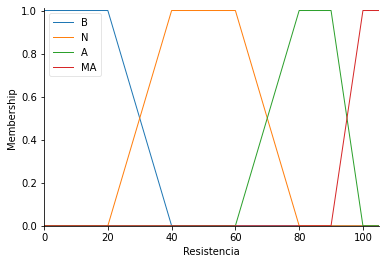

In [5]:
resistencia = ctrl.Consequent(np.arange(0, 106, 1), "Resistencia") 


resistencia["B"] = fuzz.trapmf(resistencia.universe, [0, 0, 20,40])
resistencia["N"]  = fuzz.trapmf(resistencia.universe, [20, 40, 60,80])
resistencia["A"] = fuzz.trapmf(resistencia.universe, [60, 80, 90,100])
resistencia["MA"]  = fuzz.trapmf(resistencia.universe, [90, 100, 105,105])
 
resistencia.view()

In [6]:
rule1 = ctrl.Rule(temperatura["Q"] & vazao["B"], resistencia["B"])
rule2 = ctrl.Rule(temperatura["Q"] & vazao["N"], resistencia["B"])
rule3 = ctrl.Rule(temperatura["Q"] & vazao["A"], resistencia["N"])
rule4 = ctrl.Rule(temperatura["Q"] & vazao["MA"], resistencia["N"])

rule5 = ctrl.Rule(temperatura["N"] & vazao["B"], resistencia["N"])
rule6 = ctrl.Rule(temperatura["N"] & vazao["N"], resistencia["N"])
rule7 = ctrl.Rule(temperatura["N"] & vazao["A"], resistencia["A"])
rule8 = ctrl.Rule(temperatura["N"] & vazao["MA"], resistencia["A"])

rule9 = ctrl.Rule(temperatura["F"] & vazao["B"], resistencia["A"])
rule10 = ctrl.Rule(temperatura["F"] & vazao["N"], resistencia["A"])
rule11 = ctrl.Rule(temperatura["F"] & vazao["A"], resistencia["MA"])
rule12 = ctrl.Rule(temperatura["F"] & vazao["MA"], resistencia["MA"])

rule13 = ctrl.Rule(temperatura["MF"] & vazao["B"], resistencia["A"])
rule14 = ctrl.Rule(temperatura["MF"] & vazao["N"], resistencia["MA"])
rule15 = ctrl.Rule(temperatura["MF"] & vazao["A"], resistencia["MA"])
rule16 = ctrl.Rule(temperatura["MF"] & vazao["MA"], resistencia["MA"])




In [7]:
resistencia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3 ,rule4 , rule5 , rule6 , rule7 , rule8 , rule9 , rule10 ,
                                   rule11 , rule12 , rule13 , rule14 , rule15, rule16  ]) 
resistencia2 = ctrl.ControlSystemSimulation(resistencia_ctrl)

70.50087260034906


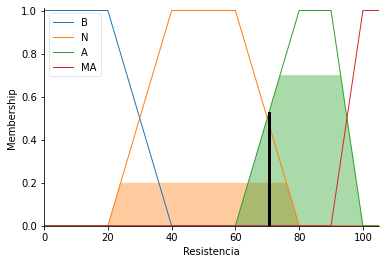

In [8]:
resistencia2.input["Temperatura"] = 32
resistencia2.input["Vazao"] = 84

resistencia2.compute()

print(resistencia2.output["Resistencia"])
resistencia.view(sim=resistencia2)

84.89583333333334


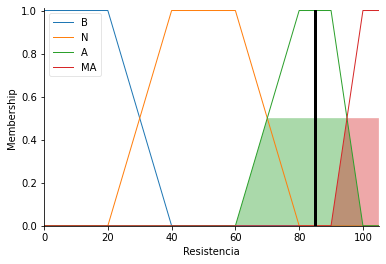

In [9]:
resistencia2.input["Temperatura"] = 15
resistencia2.input["Vazao"] = 20

resistencia2.compute()

print(resistencia2.output["Resistencia"])
resistencia.view(sim=resistencia2)

61.20689655172415


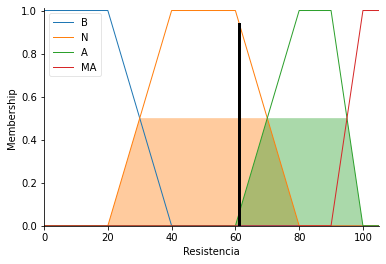

In [10]:
resistencia2.input["Temperatura"] = 35
resistencia2.input["Vazao"] = 80

resistencia2.compute()

print(resistencia2.output["Resistencia"])
resistencia.view(sim=resistencia2)